---
title: 'Lab 1'
author: "Hunter Blinkenberg"
embed-resources: true
format: 
    html:
        toc: true
        code-fold: true
        theme: vapor
        echo: true
---

### Exercises

In [2]:
import pandas as pd

In [6]:
q1_data = pd.read_csv("C:/Users/hblin/OneDrive - Cal Poly/GSB 544/Lab_1_data/q1data.csv")


    income  life_exp  population  year      country four_regions  \
0   1910.0      61.0  29200000.0  2010  Afghanistan         asia   
1  11100.0      78.1   2950000.0  2010      Albania       europe   
2  11100.0      74.7  36000000.0  2010      Algeria       africa   
3  46900.0      81.9     84500.0  2010      Andorra       europe   
4   7680.0      60.8  23400000.0  2010       Angola       africa   

                six_regions       eight_regions           world_bank_region  
0                south_asia           asia_west                  South Asia  
1       europe_central_asia         europe_east       Europe & Central Asia  
2  middle_east_north_africa        africa_north  Middle East & North Africa  
3       europe_central_asia         europe_west       Europe & Central Asia  
4        sub_saharan_africa  africa_sub_saharan          Sub-Saharan Africa  


In [7]:
q2_data = pd.read_csv("C:/Users/hblin/OneDrive - Cal Poly/GSB 544/Lab_1_data/q2data.csv")

In [8]:
q3_data = pd.read_csv("C:/Users/hblin/OneDrive - Cal Poly/GSB 544/Lab_1_data/q3data.csv")

### Task 1

1. The aesthetics are a bubble plot, with points, size, color, and labels corresponding to the variables. 
the aesthetics are mapped as such:
  x = "income",
  y = "life_exp",
  color = "four_regions",
  size = "population",
  label = "country"

In [36]:
import plotnine as plt
from plotnine import *

c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 8 rows containing missing values.


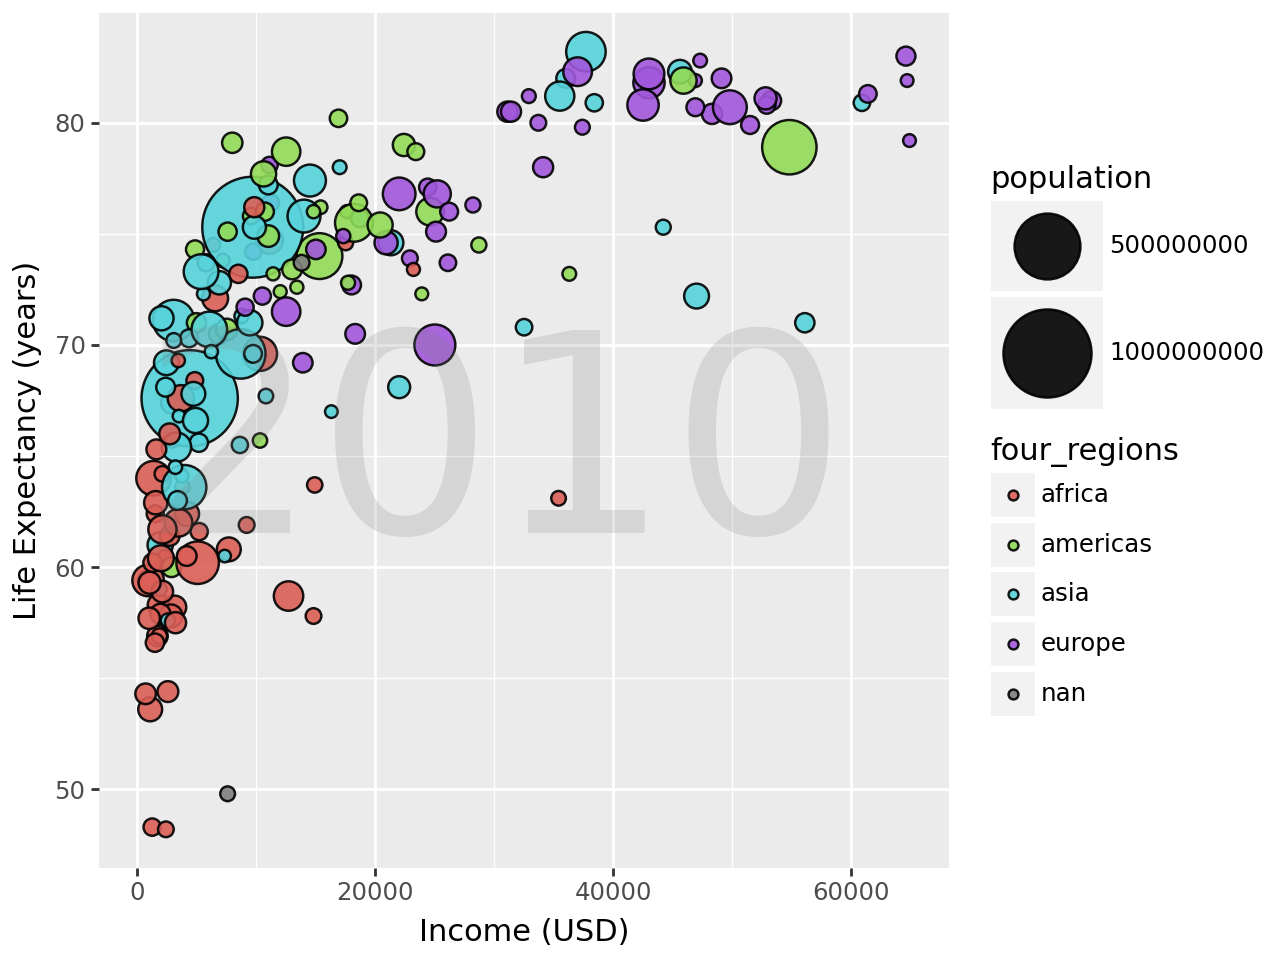

In [111]:
year = "2010"
(ggplot(q1_data,
aes(
  x = ("income"),
  y = "life_exp",
  fill = "four_regions",
  size = "population",
  label = "country"
))
+ geom_point(alpha = 0.9)
#+ geom_text(ha='left', va='bottom')
+ labs(x="Income (USD)", y="Life Expectancy (years)")
+ xlim(0,65000)
+ scale_size(range=(2,20))
#+ scale_x_log10()
+ annotate('text', x=30000, y=65, label=str(year), size=100, alpha=0.2, color='gray')
)

c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 6 rows containing non-finite values.


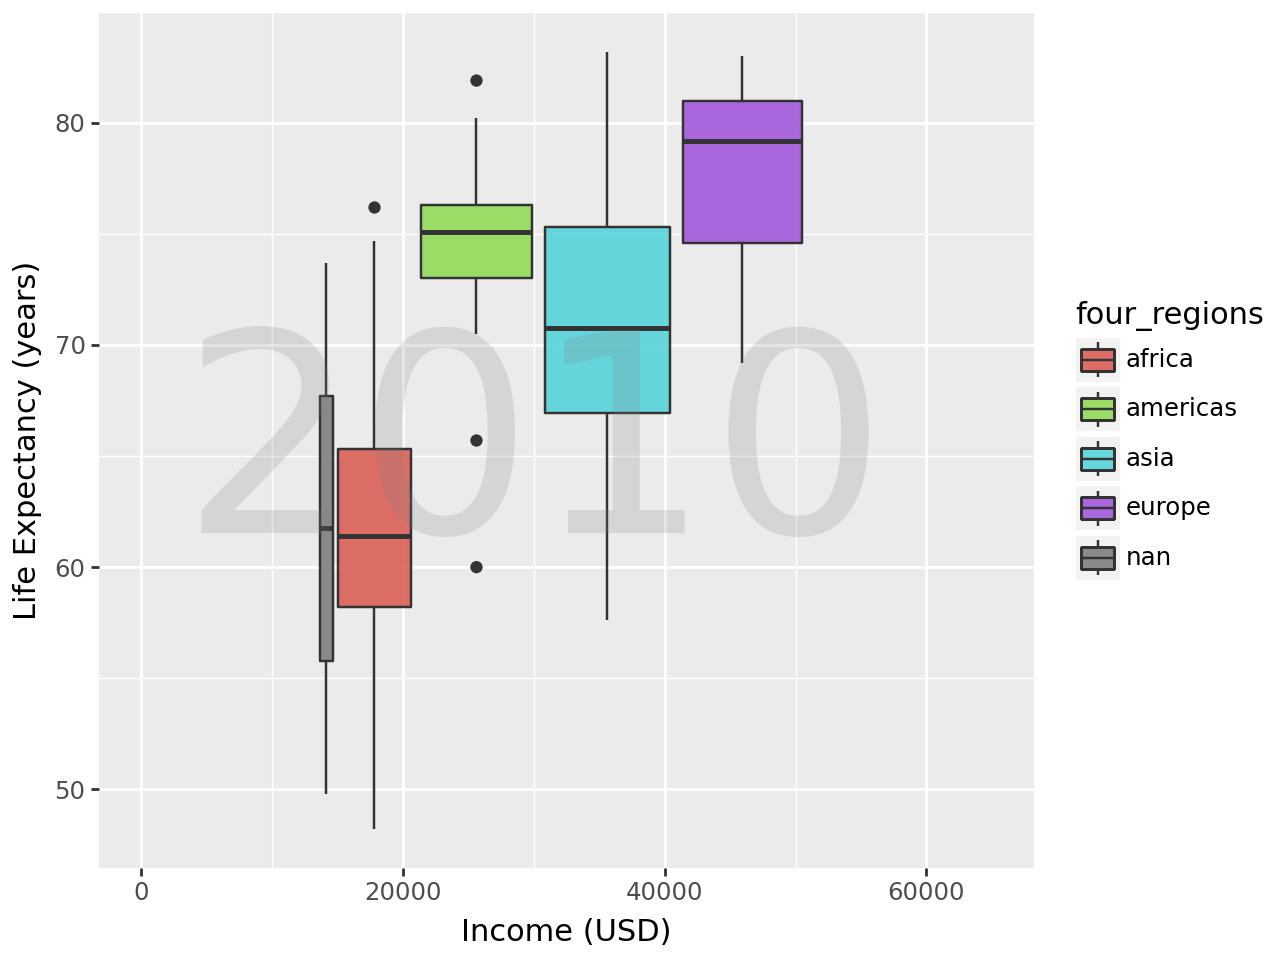

In [57]:
(ggplot(q1_data,
aes(
  x = ("income"),
  y = "life_exp",
  fill = "four_regions",
  size = "population",
  label = "country"
))
+ geom_boxplot(alpha = 0.9)
#+ geom_text(ha='left', va='bottom')
+ labs(x="Income (USD)", y="Life Expectancy (years)")
+ xlim(0,65000)
+ scale_size(range=(2,20))
#+ scale_x_log10()
+ annotate('text', x=30000, y=65, label=str(year), size=100, alpha=0.2, color='gray')
)

4. See above code for recreation of plot, and another plot using geom_boxplot. This works in a way but it groups regions together which does not allow you to see each country individually. 

### Task 2

1. The aesthetics are a bubble plot, with points, size, color, and labels corresponding to the variables. 
the aesthetics are mapped as such:
  x = "Exports (% of GDP)",
  y = "Imports (% of GDP)",
  color = "four_regions",
  size = "energy",
  label = "country"

In [ ]:
q2_data_clean = q2_data.dropna(subset=['exports', 'imports', 'four_regions', 'energy', 'country'])

In [79]:
q2_data_clean.loc[:, 'energy'] = q2_data_clean['energy'].str.replace('4000', '400')

In [81]:
q2_data_clean.loc[:, 'energy'] = q2_data_clean['energy'].str.replace('19.3000', '19300')

In [83]:
q2_data_clean.loc[:, 'energy'] = q2_data_clean['energy'].astype(int)

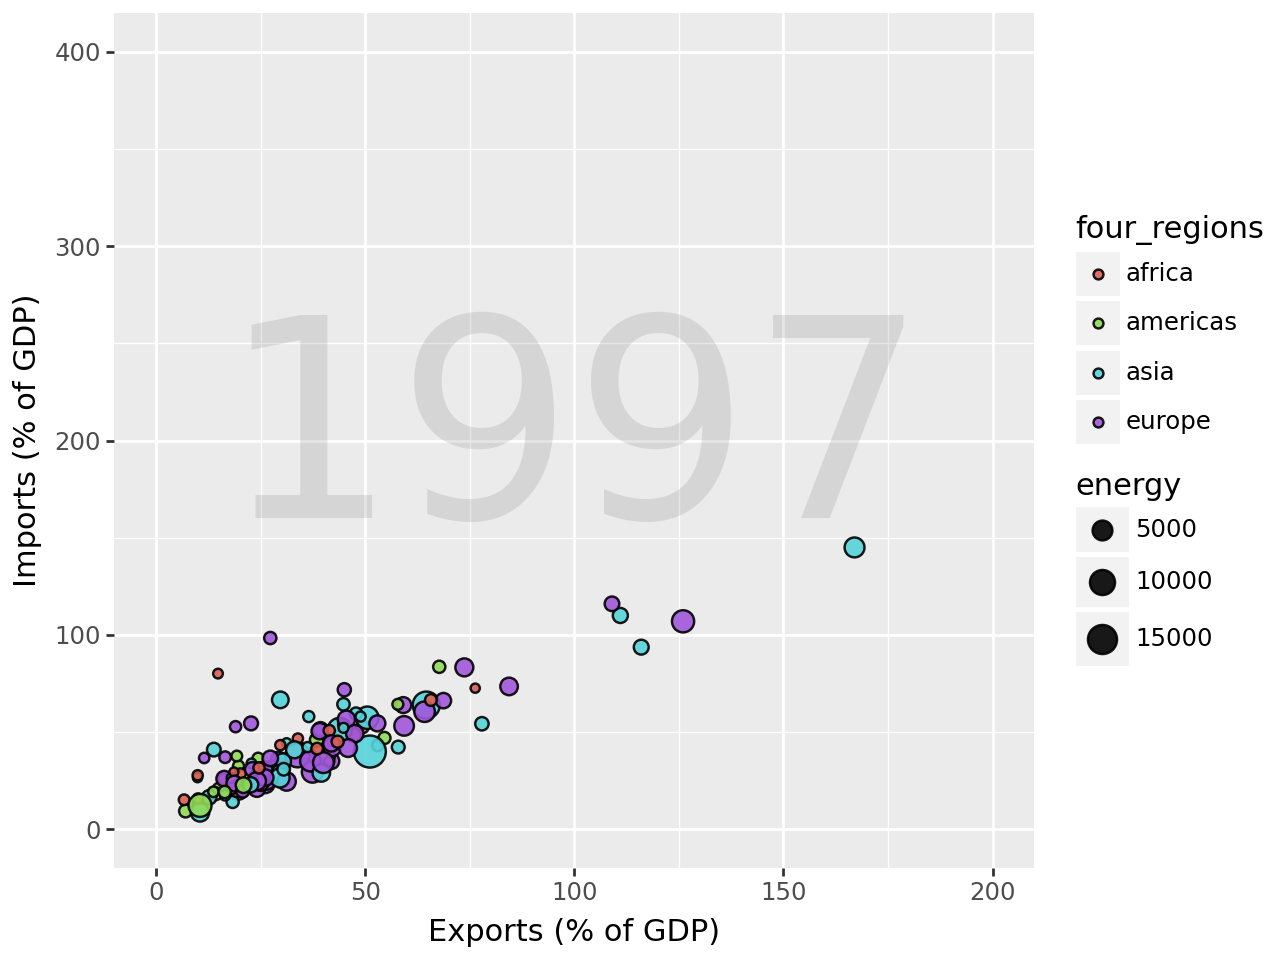

In [91]:
year = "1997"
(ggplot(q2_data_clean,
aes(
  x = "exports",
  y = "imports",
  fill = "four_regions",
  size = "energy",
  label = "country"
))
+ geom_point(alpha = 0.9)
#+ geom_text(ha='left', va='bottom')
+ labs(x="Exports (% of GDP)", y="Imports (% of GDP)")
+ xlim(0,200)
+ ylim(0, 400)
#+ scale_size(range=(2,20))
#+ scale_x_log10()
+ annotate('text', x=100, y=200, label=str(year), size=100, alpha=0.2, color='gray')
)

4. See below the use of a violin plot. This is not a good visualization since you cannot clearly see each country and the violin plots overlap each other all over the graph. 

c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\positions\position.py:232: PlotnineWarning: position_dodge requires non-overlapping x intervals


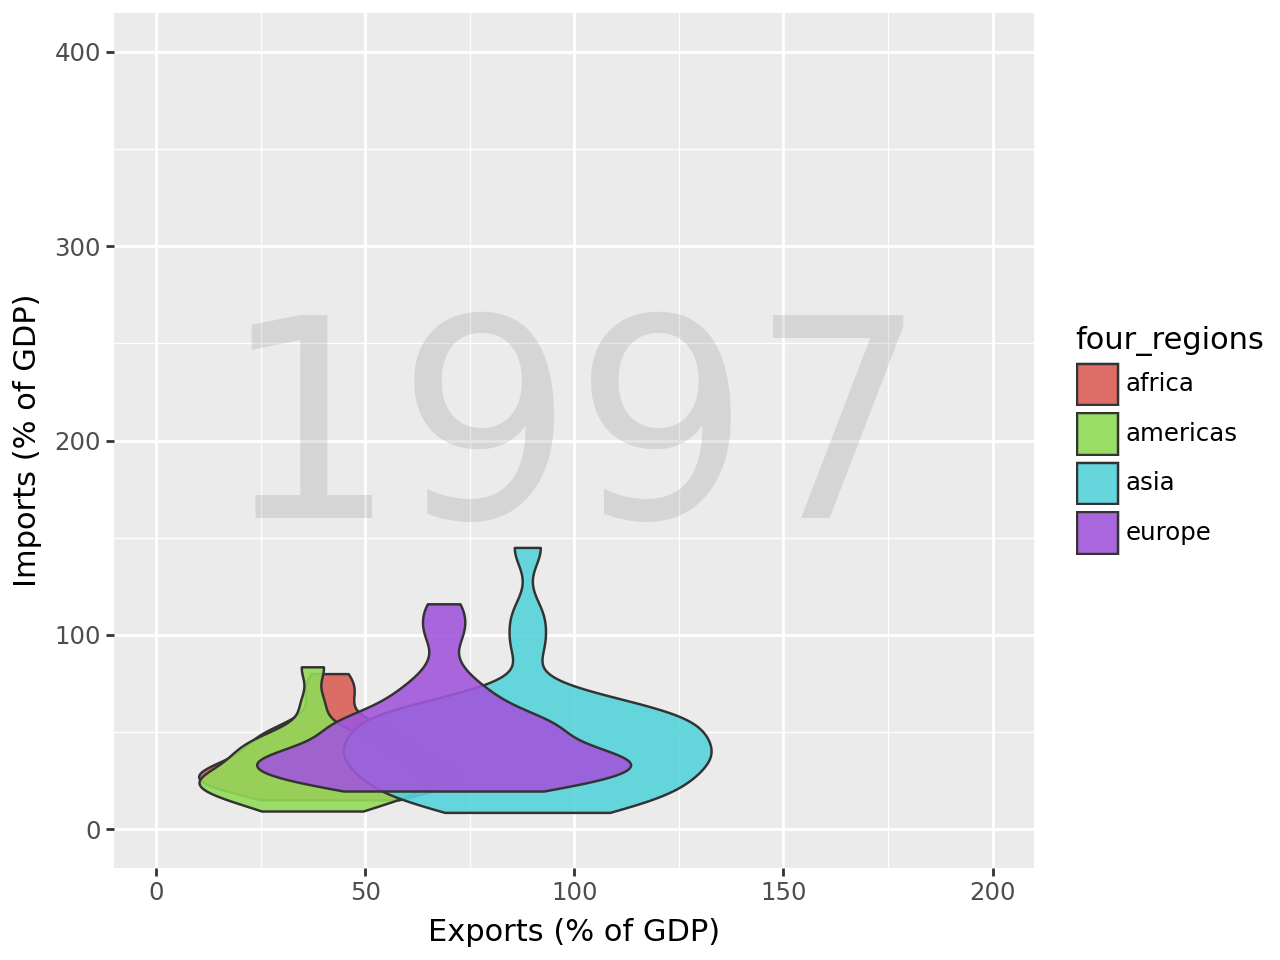

In [113]:
year = "1997"
(ggplot(q2_data_clean,
aes(
  x = "exports",
  y = "imports",
  fill = "four_regions",
  size = "energy",
  label = "country"
))
+ geom_violin(alpha = 0.9)
#+ geom_text(ha='left', va='bottom')
+ labs(x="Exports (% of GDP)", y="Imports (% of GDP)")
+ xlim(0,200)
+ ylim(0, 400)
#+ scale_size(range=(2,20))
#+ scale_x_log10()
+ annotate('text', x=100, y=200, label=str(year), size=100, alpha=0.2, color='gray')
)

### Task 3

1. The aesthetics are a bubble plot, with points, size, color, and labels corresponding to the variables. 
the aesthetics are mapped as such:
  x = "Individuals using the Internet",
  y = "Gdp/capita ",
  color = "four_regions",
  size = "income",
  label = "country"

In [96]:
q3_data_clean = q3_data.dropna(subset=['internet_users', 'gdp', 'four_regions', 'income', 'country'])

c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\scales\scales.py:48: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.



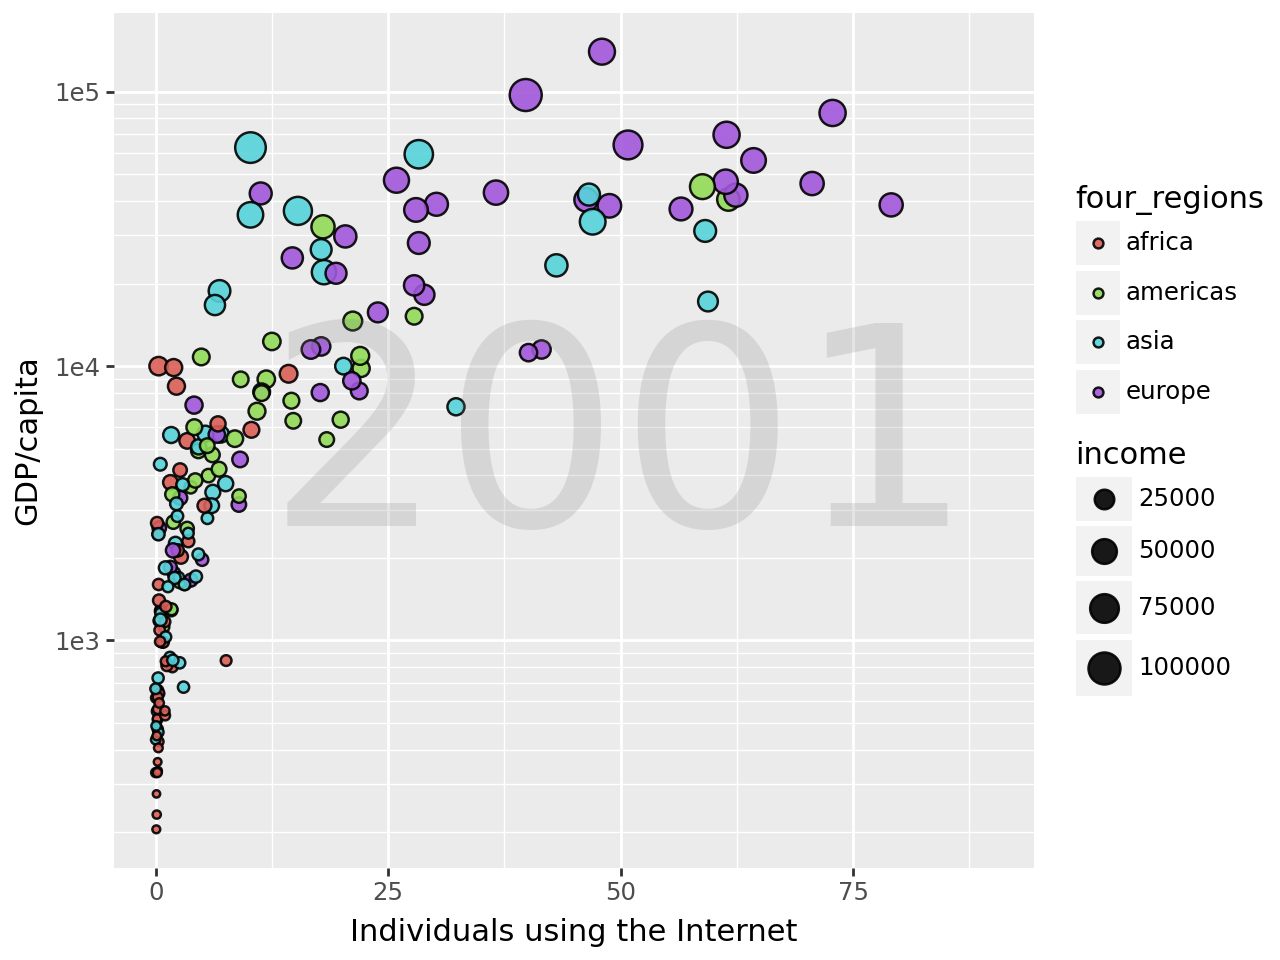

In [104]:
year = '2001'
(ggplot(q3_data_clean,
aes(
  x = "internet_users",
  y = "gdp",
  fill = "four_regions",
  size = "income",
  label = "country"
))
+ geom_point(alpha = 0.9)
#+ geom_text(ha='left', va='bottom')
+ labs(x="Individuals using the Internet", y="GDP/capita")
+ xlim(0,90)
+ ylim(0, 120000)
#+ scale_size(range=(2,20))
+ scale_y_log10()
+ annotate('text', x=50, y=5000, label=str(year), size=100, alpha=0.2, color='gray')
)

In [ ]:
(ggplot(q3_data_clean,
aes(
  x = "internet_users",
  y = "gdp",
  fill = "four_regions",
  size = "income",
  label = "country"
))
+ geom_line(alpha = 0.9)
#+ geom_text(ha='left', va='bottom')
+ labs(x="Individuals using the Internet", y="GDP/capita")
+ xlim(0,90)
+ ylim(0, 120000)
#+ scale_size(range=(2,20))
+ scale_y_log10()
+ annotate('text', x=50, y=5000, label=str(year), size=100, alpha=0.2, color='gray')
)


4. You could use geom_line, which is once again a bad idea since the data is not meant to have lines connecting each point. For data like this, it is most optimal to create bubble plots to showcase all the relevant data in a visually pleasing and cohesive way. 